In [ ]:
#necesary libraries
!pip install statsmodels==0.14.2

In [ ]:
# !pip install pmdarima

In [ ]:
# Version check
import statsmodels

statsmodels.__version__

'0.14.2'

In [ ]:
import numpy as np

import pandas as pd

# Library to do data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Library to do time series decomposition
import statsmodels.api as sm

# Module to create ACF and PACF plots
from statsmodels.graphics import tsaplots

# Module to build AR, MA, ARMA, and ARIMA models
from statsmodels.tsa.arima.model import ARIMA

# Module to implement MSE and RSME during model evaluation
from sklearn.metrics import mean_squared_error

# Code for ignoring unnecessary warnings while executing some code
import warnings
warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build models for prediction
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor

# To encode categorical variables
from sklearn.preprocessing import LabelEncoder

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To check model performance
from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error

In [ ]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [ ]:
#point to your csv location;
ps_cpi = pd.read_csv('/content/drive/MyDrive/2020 onward Sales Export_CLEANING.csv')

ps_cpi.head()

,Created_at,Order_id,order_number,currency,total,branch_Id,source_fix,product_name,product_id,price,quantity,refunded_at,refund_quantity,payment_method_company,Payment_method_wallet,financial_status,consultant_id
0,8/25/2023 11:28,5.435310e+12,218764,USD,1813.35,107,Sales,Thermomix Tm6,8.518440e+12,1499,1,NaN,0,Mastercard,NaN,paid,110101.0
1,8/26/2023 15:06,5.436430e+12,218812,USD,1799.88,107,Sales,Thermomix Tm6,8.518440e+12,1499,1,NaN,0,Visa,NaN,paid,110167.0
2,8/26/2023 18:44,5.436520e+12,218820,USD,1622.67,107,Sales,Thermomix Tm6,8.518440e+12,1499,1,NaN,0,Visa,SHOPIFY_PAY,paid,120199.0
3,8/26/2023 20:20,5.436560e+12,218822,USD,1684.78,107,Sales,Thermomix Tm6,8.518440e+12,1499,1,NaN,0,Visa,NaN,paid,110765.0
4,8/27/2023 8:40,5.436950e+12,218833,USD,1592.69,107,Sales,Thermomix Tm6,8.518440e+12,1499,1,NaN,0,NaN,NaN,paid,110765.0


In [ ]:
# Copying the data to another variable to avoid any changes to original data
df = ps_cpi.copy()

In [ ]:
# Checking for duplicate values
df.duplicated().sum()

0

In [ ]:
# Checking for missing values
df.isnull().sum()

Created_at                    0
Order_id                      0
order_number                  0
currency                      0
total                         0
branch_Id                     0
source_fix                    0
product_name                  0
product_id                    0
price                         0
quantity                      0
refunded_at               16018
refund_quantity               0
payment_method_company     8087
Payment_method_wallet     16289
financial_status              0
consultant_id              4794
dtype: int64

In [ ]:
df = df.rename(columns={'quantity': 'sales'})
print(df)

            Created_at      Order_id  order_number currency    total  \
0      8/25/2023 11:28  5.435310e+12        218764      USD  1813.35   
1      8/26/2023 15:06  5.436430e+12        218812      USD  1799.88   
2      8/26/2023 18:44  5.436520e+12        218820      USD  1622.67   
3      8/26/2023 20:20  5.436560e+12        218822      USD  1684.78   
4       8/27/2023 8:40  5.436950e+12        218833      USD  1592.69   
...                ...           ...           ...      ...      ...   
20514  7/15/2024 14:34  5.827130e+12        289316      USD  1667.06   
20515  7/15/2024 16:43  5.827210e+12        289324      USD  1696.27   
20516   7/16/2024 6:04  6.033530e+12        121364      CAD  3081.57   
20517   7/16/2024 7:41  5.827800e+12        289341      USD     0.00   
20518   7/16/2024 9:00  5.827870e+12        289345      USD     0.00   

       branch_Id source_fix        product_name    product_id  price  sales  \
0            107      Sales       Thermomix Tm6  8.51844

In [ ]:
df = df.rename(columns={'Created_at': 'date'})
print(df)

                  date      Order_id  order_number currency    total  \
0      8/25/2023 11:28  5.435310e+12        218764      USD  1813.35   
1      8/26/2023 15:06  5.436430e+12        218812      USD  1799.88   
2      8/26/2023 18:44  5.436520e+12        218820      USD  1622.67   
3      8/26/2023 20:20  5.436560e+12        218822      USD  1684.78   
4       8/27/2023 8:40  5.436950e+12        218833      USD  1592.69   
...                ...           ...           ...      ...      ...   
20514  7/15/2024 14:34  5.827130e+12        289316      USD  1667.06   
20515  7/15/2024 16:43  5.827210e+12        289324      USD  1696.27   
20516   7/16/2024 6:04  6.033530e+12        121364      CAD  3081.57   
20517   7/16/2024 7:41  5.827800e+12        289341      USD     0.00   
20518   7/16/2024 9:00  5.827870e+12        289345      USD     0.00   

       branch_Id source_fix        product_name    product_id  price  sales  \
0            107      Sales       Thermomix Tm6  8.51844

In [ ]:
# Reset index
#edmonton_data = edmonton_data.reset_index()

In [ ]:
# List of all important categorical variables
cat_col = ["source_fix", "product_name", 'branch_Id', 'financial_status', 'consultant_id', 'payment_method_company', 'currency']

# Printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(df[column].value_counts(1))
    print("-" * 50)

source_fix
Sales                0.683172
Online               0.233198
TM4U                 0.076076
Consultant Retail    0.007213
Retail               0.000341
Name: proportion, dtype: float64
--------------------------------------------------
product_name
Thermomix Tm6                    0.829280
Thermomix Tm6 Sparkling Black    0.097227
Thermomix Tm6 Noir               0.073395
NSF TM5                          0.000049
TM5 incl. Cook-Key               0.000049
Name: proportion, dtype: float64
--------------------------------------------------
branch_Id
999     0.233637
1235    0.070276
125     0.065403
113     0.052293
122     0.050197
107     0.045957
1234    0.041571
118     0.040597
2523    0.036600
1031    0.034992
195     0.032896
317     0.032214
121     0.032068
1952    0.028851
407     0.027974
109     0.027633
124     0.021980
111     0.019787
131     0.019250
126     0.018617
374     0.015352
480     0.014572
1483    0.013597
133     0.010868
112     0.006920
117     0.002

online branch is 23% of all sales from the set, w no individual level branch contributing more than 7% to the volume*
Three consultants that account for 1% of total sales each** 405143 might be most high value, followed by JIe, but need recruitment to complete that, not this point.
refunds less than 4% of all orders
Sales 70% , online
almost 2/3 american orders* do that w price**

In [ ]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )                   # Creating the 2 subplots
    sns.boxplot(data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )                   # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )                   # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )                   # Add median to the histogram

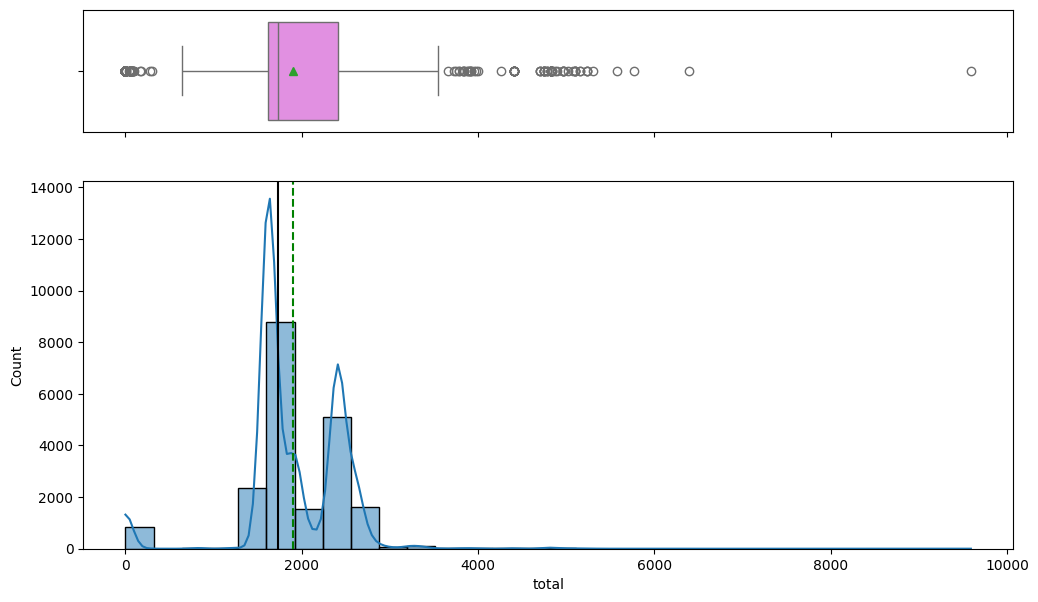

In [ ]:
histogram_boxplot(df, "total", kde = True, bins = 30)

follows w the price pattern, bimodal.
Do need to dive into the 0s**, although might be consultant units** assumed


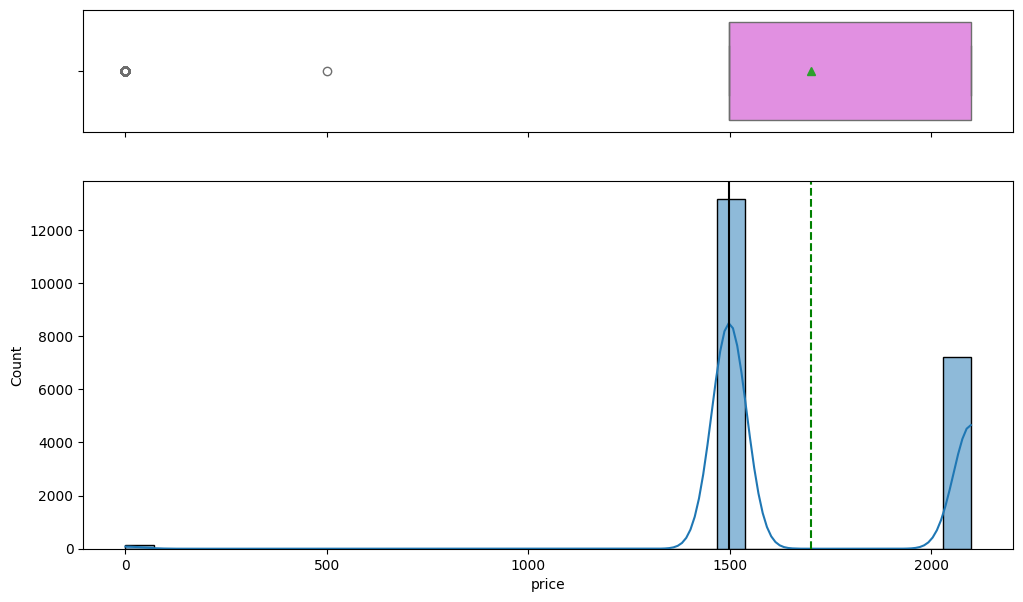

In [ ]:
histogram_boxplot(df, "price", kde = True, bins = 30)

CLearly Bimodal, once you add by product tpe the outliers will disappear.
Bimodal because US vs Canada***

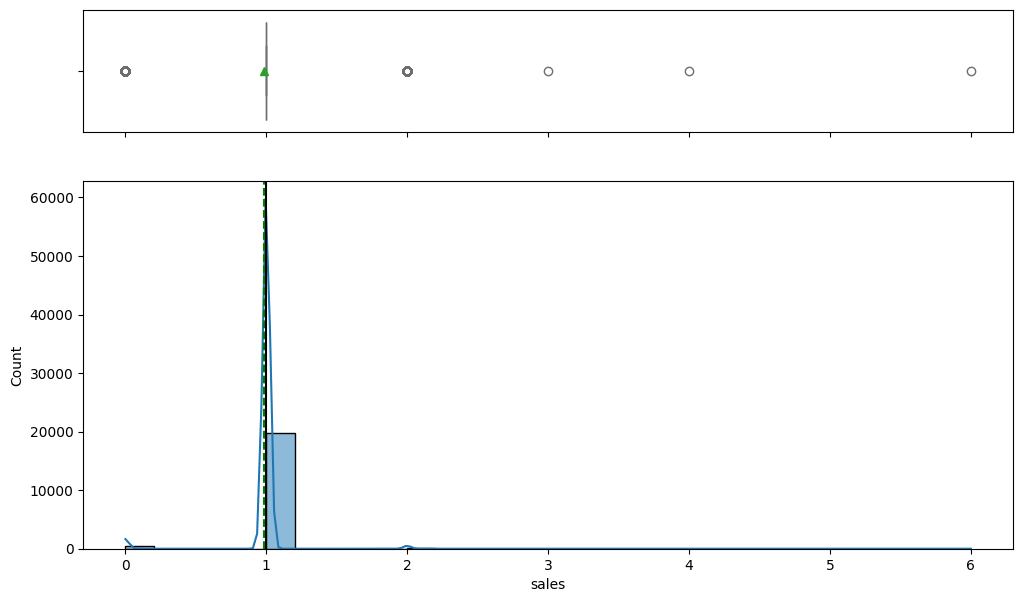

In [ ]:
histogram_boxplot(df, "sales", kde = 'sales', bins = 30)

1 is most that consultants sell; more often* to sell 0 than 2*


In [ ]:
df= df.drop(columns=['Order_id', 'order_number'])

In [ ]:
df= df.drop(columns=['branch_Id'])

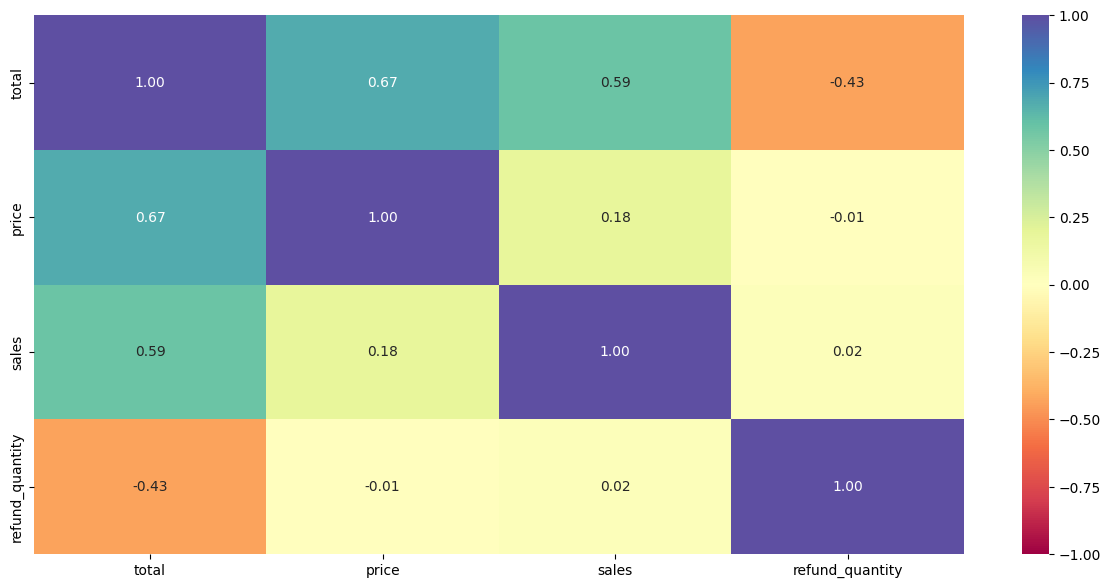

In [ ]:
# Exclude non-numeric columns
numeric_data = df.select_dtypes(include=np.number)

# Create heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(numeric_data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [ ]:
# Function to plot stacked bar plots

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins = True).sort_values(
        by = sorter, ascending = False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize = "index").sort_values(
        by = sorter, ascending = False
    )
    tab.plot(kind = "bar", stacked = True, figsize = (count + 1, 5))
    plt.legend(
        loc = "lower left",
        frameon = False,
    )
    plt.legend(loc = "upper left", bbox_to_anchor = (1, 1))
    plt.show()

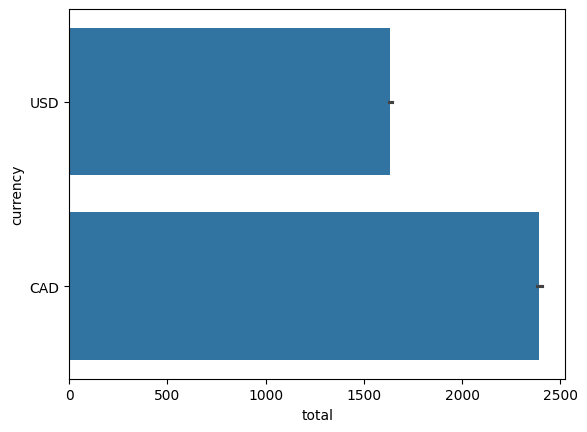

In [ ]:
sns.barplot(y = 'currency', x = 'total', data = df)
plt.show()

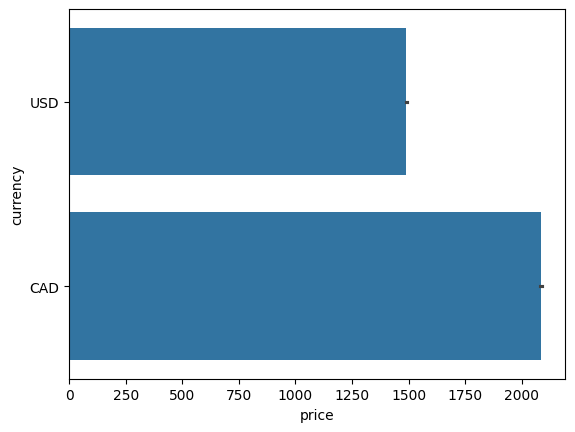

In [ ]:
sns.barplot(y = 'currency', x = 'price', data = df)
plt.show()

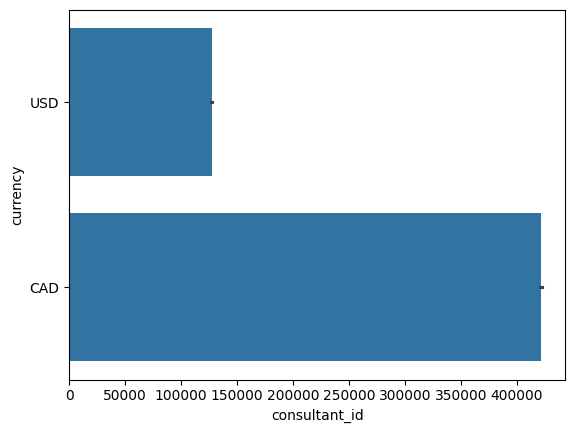

In [ ]:
sns.barplot(y = 'currency', x = 'consultant_id', data = df)
plt.show()

In [ ]:
#Recode categorical sources to appropriate stuff:
mapping = {
    "Consultant Retail": "Sales",
    "Retail": "Online"
}

# Apply the mapping to recode the categorical variable
df['source_fix'] = df['source_fix'].map(mapping).fillna(df['source_fix'])

# Display the updated DataFrame
print(df)

                  date currency    total  branch_Id source_fix  \
0      8/25/2023 11:28      USD  1813.35        107      Sales   
1      8/26/2023 15:06      USD  1799.88        107      Sales   
2      8/26/2023 18:44      USD  1622.67        107      Sales   
3      8/26/2023 20:20      USD  1684.78        107      Sales   
4       8/27/2023 8:40      USD  1592.69        107      Sales   
...                ...      ...      ...        ...        ...   
20514  7/15/2024 14:34      USD  1667.06        999     Online   
20515  7/15/2024 16:43      USD  1696.27        999     Online   
20516   7/16/2024 6:04      CAD  3081.57        999     Online   
20517   7/16/2024 7:41      USD     0.00        999     Online   
20518   7/16/2024 9:00      USD     0.00        999     Online   

             product_name    product_id  price  sales refunded_at  \
0           Thermomix Tm6  8.518440e+12   1499      1         NaN   
1           Thermomix Tm6  8.518440e+12   1499      1         NaN   


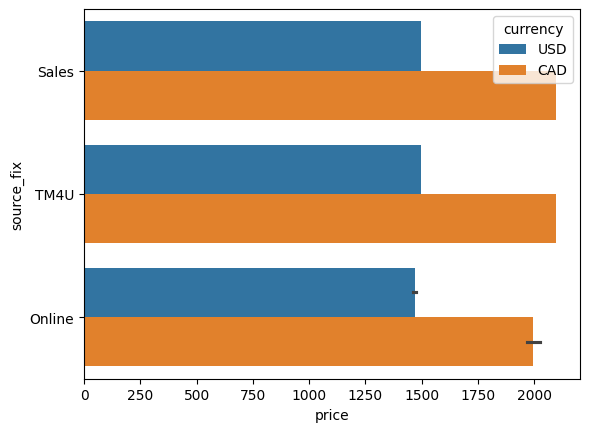

In [ ]:
sns.barplot(y = 'source_fix', x = 'price', hue = 'currency', data = df)
plt.show()

the differences you see between prices and source is normalizedish/explained when you add country into the mix, basically, it looks like Canadian online units ARE sold for lower average price,

In [ ]:
from scipy.stats import ttest_ind
# Filter data where currency is CAD
df_cad = df[df['currency'] == 'CAD']

# Separate price data by source_fix
price_consultant_retail = df_cad[df_cad['source_fix'] == 'Sales']['price']
price_retail = df_cad[df_cad['source_fix'] == 'Online']['price']

# Perform independent t-test
t_statistic, p_value = ttest_ind(price_consultant_retail, price_retail, equal_var=False)

# Print results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: 7.319546268434786
P-value: 4.970910520722757e-13


                  sum_sq      df           F        PR(>F)
source_fix  9.431883e+06     2.0  160.377731  6.953514e-69
Residual    2.136877e+08  7267.0         NaN           NaN
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
Online  Sales 102.8329   0.0  89.2615 116.4042   True
Online   TM4U 102.8329   0.0  82.7281 122.9376   True
 Sales   TM4U      0.0   1.0 -16.6714  16.6714  False
-----------------------------------------------------


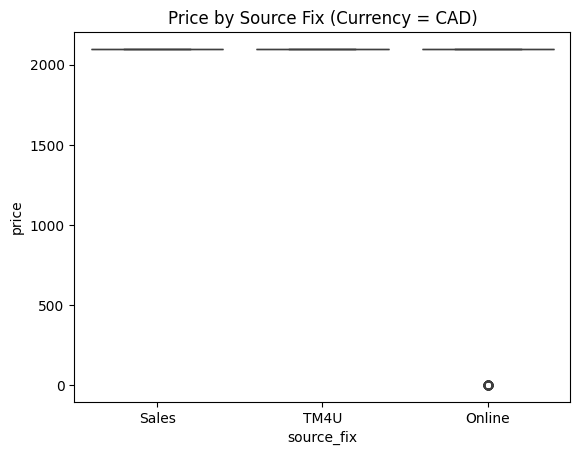

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols




# Filter data where currency is CAD
df_cad = df[df['currency'] == 'CAD']

# ANOVA model
model = ols('price ~ source_fix', data=df_cad).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print ANOVA table
print(anova_table)

# Post-hoc Tukey HSD test
tukey_results = pairwise_tukeyhsd(df_cad['price'], df_cad['source_fix'])
print(tukey_results)

# Plotting the results (optional)
sns.boxplot(x='source_fix', y='price', data=df_cad)
plt.title('Price by Source Fix (Currency = CAD)')
plt.show()

Differences are sig across both t test and anova.

im going to triple check, but the likelihood is that the consultant orders arent being coded like the US orders/are being attributed to the oNLINE orders** in Canada** resulting int he lower online price**

In [ ]:
# Convert consultant_Id to categorical
df['consultant_id'] = df['consultant_id'].astype('category')

In [ ]:
# Convert branch_Id to categorical
df['product_id'] = df['product_id'].astype('category')

In [ ]:
# Convert branch_Id to categorical
df['branch_id'] = df['branch_Id'].astype('category')

In [ ]:
print(df)

                  date currency    total source_fix        product_name  \
0      8/25/2023 11:28      USD  1813.35      Sales       Thermomix Tm6   
1      8/26/2023 15:06      USD  1799.88      Sales       Thermomix Tm6   
2      8/26/2023 18:44      USD  1622.67      Sales       Thermomix Tm6   
3      8/26/2023 20:20      USD  1684.78      Sales       Thermomix Tm6   
4       8/27/2023 8:40      USD  1592.69      Sales       Thermomix Tm6   
...                ...      ...      ...        ...                 ...   
20514  7/15/2024 14:34      USD  1667.06     Online       Thermomix Tm6   
20515  7/15/2024 16:43      USD  1696.27     Online       Thermomix Tm6   
20516   7/16/2024 6:04      CAD  3081.57     Online       Thermomix Tm6   
20517   7/16/2024 7:41      USD     0.00     Online       Thermomix Tm6   
20518   7/16/2024 9:00      USD     0.00     Online  Thermomix Tm6 Noir   

         product_id  price  sales refunded_at  refund_quantity  \
0      8.518440e+12   1499      1

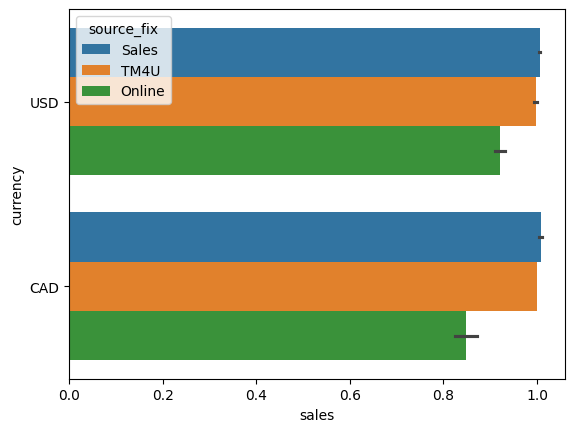

In [ ]:
sns.barplot(y = 'currency', x = 'sales', hue = 'source_fix', data = df)
plt.show()

              sum_sq       df         F    PR(>F)
currency    0.033553      1.0  0.938331  0.332719
Residual  733.650350  20517.0       NaN       NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   CAD    USD  -0.0027 0.3327 -0.0081 0.0027  False
---------------------------------------------------


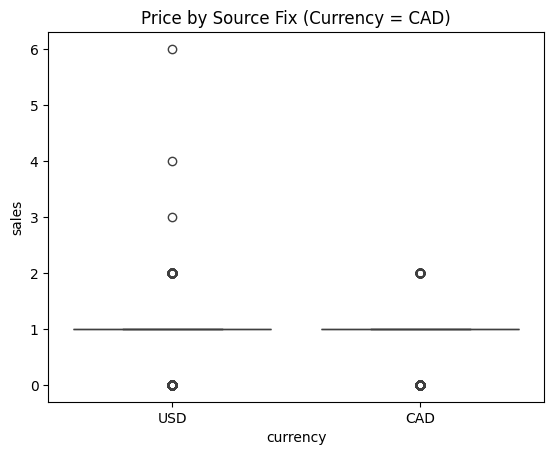

In [ ]:


# ANOVA model
model = ols('sales ~ currency', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print ANOVA table
print(anova_table)

# Post-hoc Tukey HSD test
tukey_results = pairwise_tukeyhsd(df['sales'], df['currency'])
print(tukey_results)

# Plotting the results (optional)
sns.boxplot(x='currency', y='sales', data=df)
plt.title('Price by Source Fix (Currency = CAD)')
plt.show()

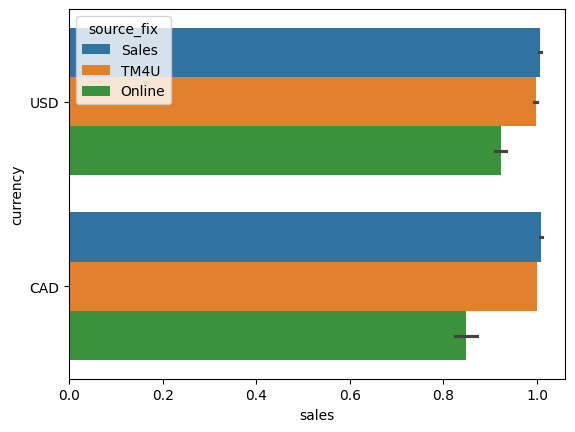

In [ ]:
sns.barplot(y = 'currency', x = 'sales', hue = 'source_fix', data = df)
plt.show()

No sig dif in avg sales by country

              sum_sq      df          F        PR(>F)
currency    4.421800     1.0  35.529734  2.691883e-09
Residual  596.132249  4790.0        NaN           NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
   CAD    USD   0.0737   0.0 0.0494 0.0979   True
-------------------------------------------------


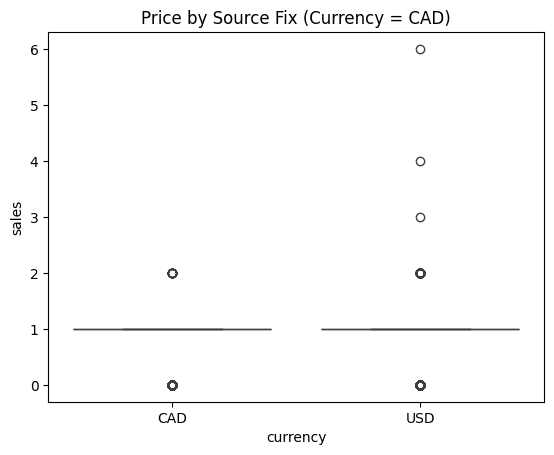

In [ ]:
# Filter data where currency is CAD
df_source = df[df['source_fix'] == 'Online']

# ANOVA model
model = ols('sales ~ currency', data=df_source).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print ANOVA table
print(anova_table)

# Post-hoc Tukey HSD test
tukey_results = pairwise_tukeyhsd(df_source['sales'], df_source['currency'])
print(tukey_results)

# Plotting the results (optional)
sns.boxplot(x='currency', y='sales', data=df_source)
plt.title('Price by Source Fix (Currency = CAD)')
plt.show()

Yes, one country does sell sig more online units; it might be canada? Makes somewhat sense b/c of issues w geographical spread and consultant access?  

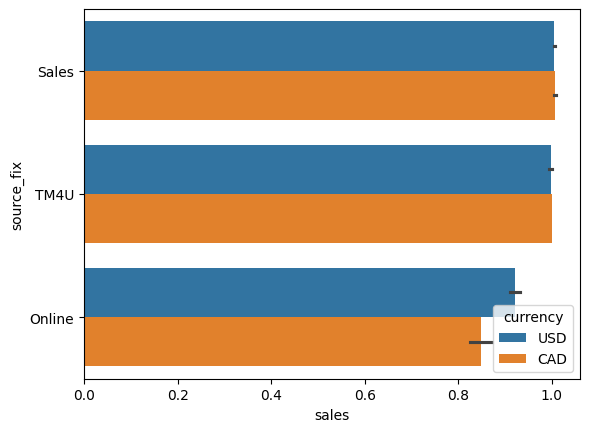

In [ ]:
sns.barplot(y = 'source_fix', x = 'sales', hue = 'currency', data = df)
plt.show()

In [ ]:
df.groupby(['branch_id'])['source_fix'].agg(source_fix='unique',sales='count')

,source_fix,sales
branch_id,,
107,"[Sales, TM4U]",943
109,"[Sales, TM4U]",567
111,"[Sales, TM4U]",406
112,"[TM4U, Sales]",142
113,"[Sales, TM4U]",1073
117,"[Sales, TM4U]",61
118,"[Sales, TM4U]",833
121,"[Sales, TM4U]",658
122,"[Sales, TM4U]",1030


In [ ]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Now you should be able to access the 'date' column
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

In [ ]:
print(df)

                     date currency    total source_fix        product_name  \
0     2023-08-25 11:28:00      USD  1813.35      Sales       Thermomix Tm6   
1     2023-08-26 15:06:00      USD  1799.88      Sales       Thermomix Tm6   
2     2023-08-26 18:44:00      USD  1622.67      Sales       Thermomix Tm6   
3     2023-08-26 20:20:00      USD  1684.78      Sales       Thermomix Tm6   
4     2023-08-27 08:40:00      USD  1592.69      Sales       Thermomix Tm6   
...                   ...      ...      ...        ...                 ...   
20514 2024-07-15 14:34:00      USD  1667.06     Online       Thermomix Tm6   
20515 2024-07-15 16:43:00      USD  1696.27     Online       Thermomix Tm6   
20516 2024-07-16 06:04:00      CAD  3081.57     Online       Thermomix Tm6   
20517 2024-07-16 07:41:00      USD     0.00     Online       Thermomix Tm6   
20518 2024-07-16 09:00:00      USD     0.00     Online  Thermomix Tm6 Noir   

         product_id  price  sales refunded_at  refund_quantity 

In [ ]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [ ]:
#Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%b-%y')

# Now you should be able to access the 'date' column
df['Timestamp'] = pd.to_datetime(df['date'], dayfirst=True)

In [ ]:
df['month_year'] = df['date'].dt.strftime('%b-%Y')

print(df)

                     date currency    total source_fix        product_name  \
0     2023-08-25 11:28:00      USD  1813.35      Sales       Thermomix Tm6   
1     2023-08-26 15:06:00      USD  1799.88      Sales       Thermomix Tm6   
2     2023-08-26 18:44:00      USD  1622.67      Sales       Thermomix Tm6   
3     2023-08-26 20:20:00      USD  1684.78      Sales       Thermomix Tm6   
4     2023-08-27 08:40:00      USD  1592.69      Sales       Thermomix Tm6   
...                   ...      ...      ...        ...                 ...   
20514 2024-07-15 14:34:00      USD  1667.06     Online       Thermomix Tm6   
20515 2024-07-15 16:43:00      USD  1696.27     Online       Thermomix Tm6   
20516 2024-07-16 06:04:00      CAD  3081.57     Online       Thermomix Tm6   
20517 2024-07-16 07:41:00      USD     0.00     Online       Thermomix Tm6   
20518 2024-07-16 09:00:00      USD     0.00     Online  Thermomix Tm6 Noir   

         product_id  price  sales refunded_at  refund_quantity 

In [ ]:
df= df.drop(columns=['date', 'Timestamp'])

Building the MOdel:

Data PRep

In [ ]:
# Creating dummy variables for the categorical columns
# drop_first=True is used to avoid redundant variables
data = pd.get_dummies(
    df,
    columns = df.select_dtypes(include = ["object", "category"]).columns.tolist(),
    drop_first = True,
)

In [ ]:
# Separating independent variables and the target variable
x = data.drop('sales',axis=1)

y = data['sales']

In [ ]:
# Splitting the dataset into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 1)

In [ ]:
# Checking the shape of the train and test data
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)

Shape of Training set :  (16415, 7471)
Shape of test set :  (4104, 7471)


Model Building

We will be using different metrics functions defined in sklearn like RMSE, MAE, 𝑅2, Adjusted 𝑅2, and MAPE for regression model evaluation. We will define a function to calculate these metrics.
The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage and can be calculated as the average absolute percentage error for all data points. The absolute percentage error is defined as the predicted value minus actual value divided by actual value. It works best if there are no extreme values in the data and none of the actual values are 0.

In [ ]:
# Function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    pred = model.predict(predictors)                  # Predict using the independent variables
    r2 = r2_score(target, pred)                       # To compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)    # To compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # To compute RMSE
    mae = mean_absolute_error(target, pred)           # To compute MAE
    mape = mape_score(target, pred)                   # To compute MAPE

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

**What is a Decision Tree?**

Decision Trees are a type of supervised machine learning algorithm that can be used for **both classification and regression tasks**. They are often used in business and industry to make decisions based on data, and are particularly useful for tasks that require decision-making based on a set of conditions.

**How does a Decision Tree work?**

A Decision Tree works by recursively splitting the dataset into smaller subsets based on the feature that provides the most information gain at each step. This process continues until the subsets are as pure as possible, meaning that they contain as few mixed class labels as possible, or until a stopping criterion is met (e.g., when a maximum depth is reached).

$$\large Information\ Gain = Entropy\ before\ split - Entropy\ after\ split$$

where, $$\large Entropy = -\sum_{i=1}^{c} p_i \log_2 p_i$$

Here, $p$ is the proportion of positive instances in the subset.

The goal of the algorithm is to find the tree that provides the best predictions on the training data, while also being as simple and interpretable as possible.

In [ ]:
# Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state = 1)

# Fitting the model
dt_regressor.fit(x_train, y_train)

# Model Performance on the test data, i.e., prediction
dt_regressor_perf_test = model_performance_regression(dt_regressor, x_test, y_test)

dt_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.044151,0.001949,0.938015,1.075512,inf


Let's visualize the decision tree and examine the tree's decision rules. Visualizing a Decision Tree can help you understand how the algorithm works and interpret its predictions. Visualizing the tree can help us to:

Identify the root node: The first node at the top of the tree is called the root node. It represents the entire dataset and is used to split the data into two or more homogeneous subsets.

Identify the internal nodes: The nodes that are not leaf nodes are called internal nodes. They represent a decision or a test on a feature and are used to split the data into smaller subsets based on the feature value.

Identify the leaf nodes: The nodes at the bottom of the tree are called leaf nodes. They represent the output or the class label of the data after going through all the splits in the tree.

Follow a path from the root to a leaf node: To interpret a decision tree, you can follow a path from the root node to a leaf node. Along the path, you can see the tests performed on the features, and based on the test results, the data is split into smaller subsets.

Analyze the feature importance: You can analyze the feature importance by looking at the splits in the tree. The features used to split the data at the top of the tree are the most important features, as they have the highest impact on the decision.

Analyze the class distribution: You can analyze the class distribution at the leaf nodes to understand how the decision tree predicts the class labels. If the majority of the samples in a leaf node belong to a particular class, the decision tree predicts that class for the new data.

Explain the decision: Finally, you can explain the decision made by the decision tree by summarizing the path taken from the root to the leaf node and the class label predicted at the leaf node. You can also explain the importance of the features used in the decision and how they influence the final prediction.

We will limit the decision tree's depth to two so that we can visualize it better.

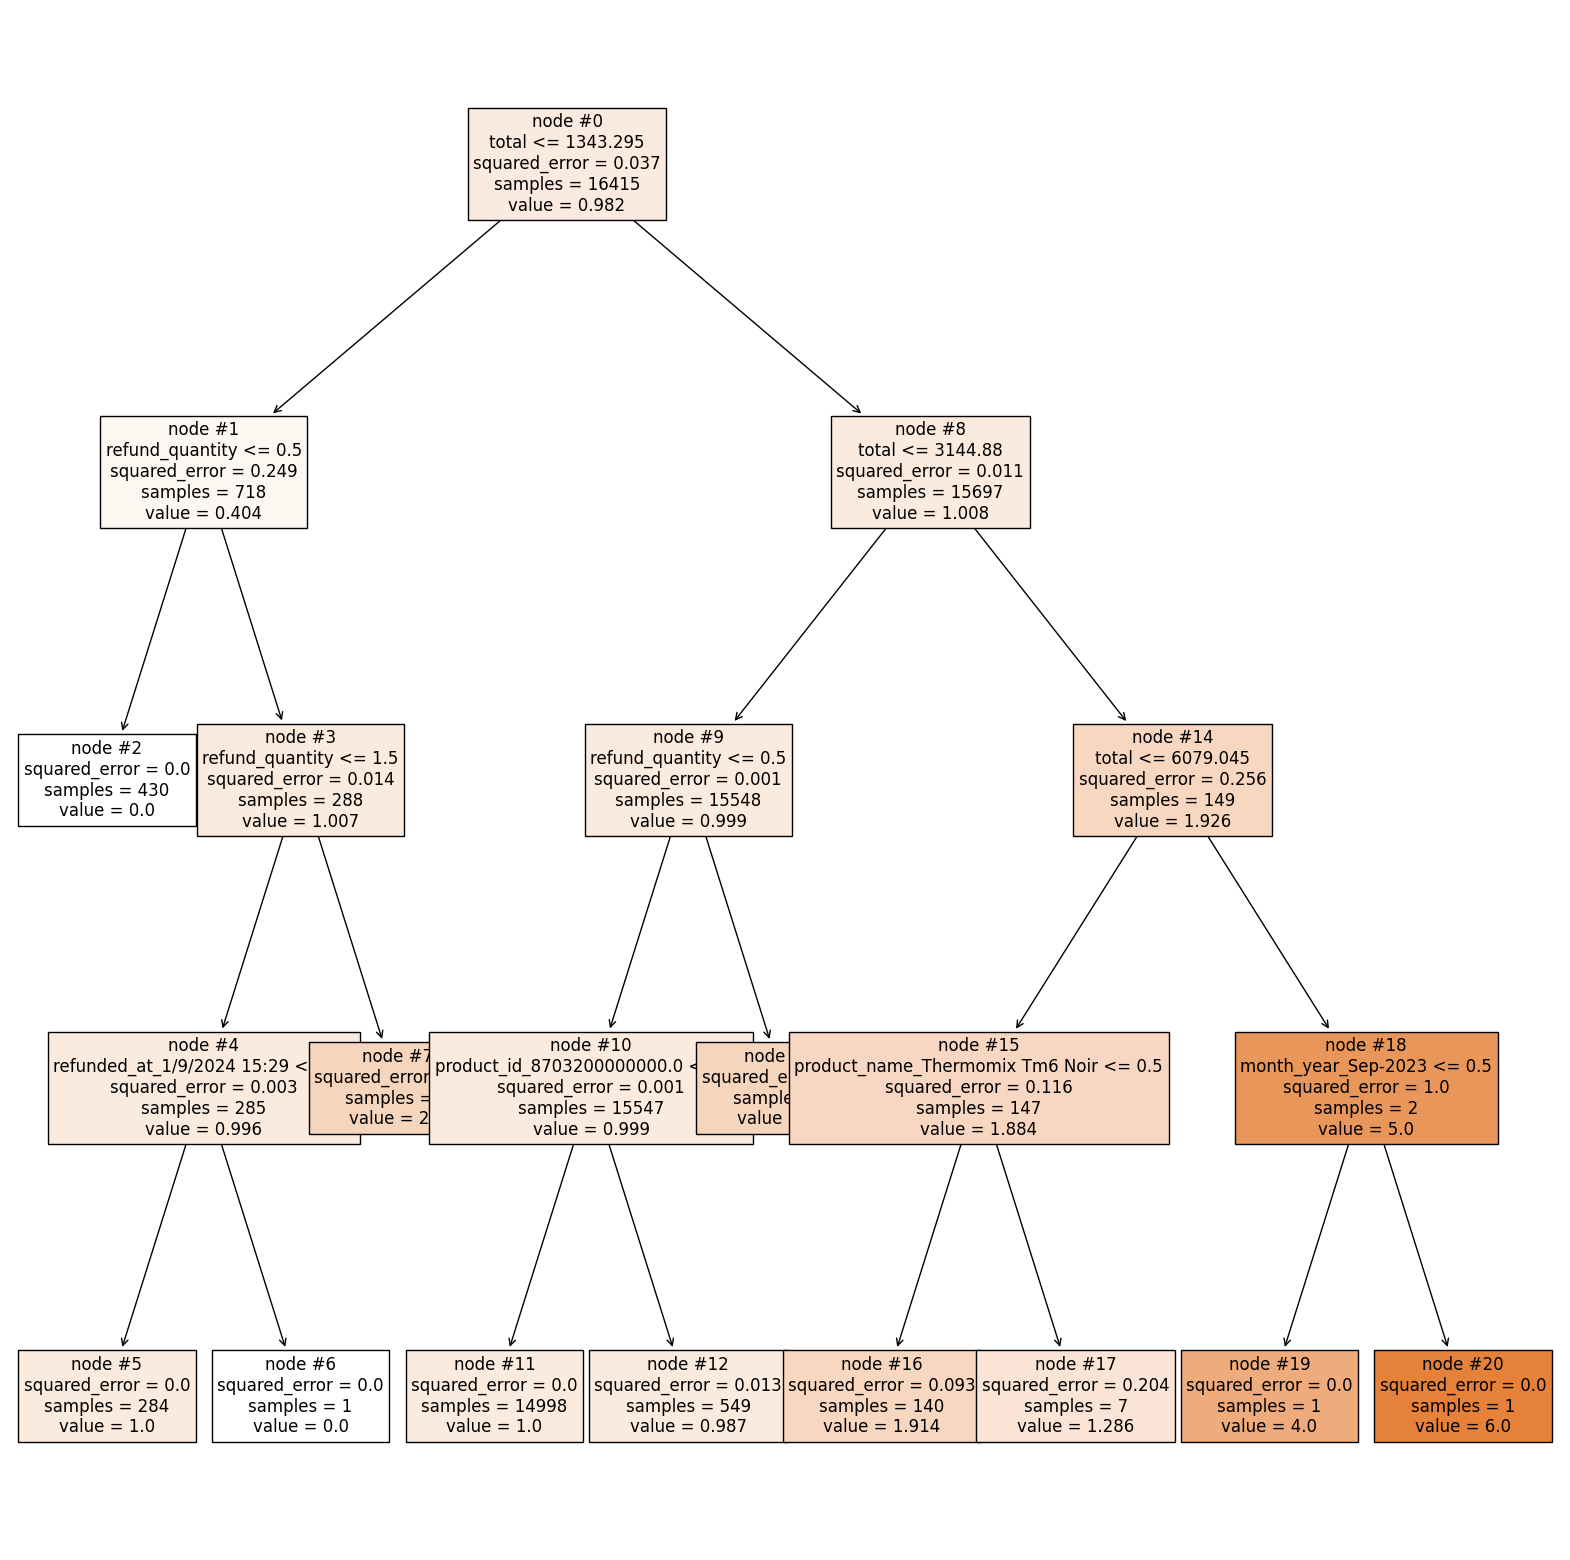

In [ ]:
from sklearn import tree
features = list(x.columns)

# Building the model with max_depth=3
dt_regressor_visualize = DecisionTreeRegressor(random_state = 1, max_depth=4)

# Fitting the model
dt_regressor_visualize.fit(x_train, y_train)


plt.figure(figsize = (20, 20))
tree.plot_tree(dt_regressor_visualize, feature_names = features, filled = True, fontsize = 12,
               node_ids = True, class_names = None)
plt.show()

In [ ]:
print(tree.export_text(dt_regressor_visualize, feature_names=x_train.columns.tolist(), show_weights=True))

|--- total <= 1343.30
|   |--- refund_quantity <= 0.50
|   |   |--- value: [0.00]
|   |--- refund_quantity >  0.50
|   |   |--- refund_quantity <= 1.50
|   |   |   |--- refunded_at_1/9/2024 15:29 <= 0.50
|   |   |   |   |--- value: [1.00]
|   |   |   |--- refunded_at_1/9/2024 15:29 >  0.50
|   |   |   |   |--- value: [0.00]
|   |   |--- refund_quantity >  1.50
|   |   |   |--- value: [2.00]
|--- total >  1343.30
|   |--- total <= 3144.88
|   |   |--- refund_quantity <= 0.50
|   |   |   |--- product_id_8703200000000.0 <= 0.50
|   |   |   |   |--- value: [1.00]
|   |   |   |--- product_id_8703200000000.0 >  0.50
|   |   |   |   |--- value: [0.99]
|   |   |--- refund_quantity >  0.50
|   |   |   |--- value: [2.00]
|   |--- total >  3144.88
|   |   |--- total <= 6079.05
|   |   |   |--- product_name_Thermomix Tm6 Noir <= 0.50
|   |   |   |   |--- value: [1.91]
|   |   |   |--- product_name_Thermomix Tm6 Noir >  0.50
|   |   |   |   |--- value: [1.29]
|   |   |--- total >  6079.05
|   |   |

Youll need to go back and re run wo any time, drop refunds as well or roll it up into one column.

Also looks liek the consulant purchase price impact is being sussesed out here, go back and re clean that. **

What is a Bagging Regressor?

Bagging (short for Bootstrap Aggregating) is an ensemble learning technique that involves training multiple models on different subsets of the training data and then combining their predictions. The idea is to reduce variance and overfitting by averaging the predictions of many models.

A Bagging Regressor is a type of Bagging algorithm used for regression tasks. It involves training multiple regression models (e.g., Decision Trees) on different subsets of the training data and then combining their predictions by taking the average.

How does a Bagging Regressor work?

The Bagging Regressor works by generating multiple subsets of the training data by randomly selecting data points with replacement (i.e., allowing the same data point to be selected more than once in the same subset). Each subset is used to train a separate regression model, and the predictions of these models are combined by taking their average.

The idea behind this approach is that by training multiple models on different subsets of the data, we can reduce the variance and overfitting of the final model, while still maintaining the same bias as a single model trained on the entire dataset.

Prediction=average of predictions of individual decision tree regressors

In [ ]:
# Bagging Regressor
bagging_estimator = BaggingRegressor(random_state = 1)

# Fitting the model
bagging_estimator.fit(x_train, y_train)

# Model Performance on the test data
bagging_estimator_perf_test = model_performance_regression(bagging_estimator, x_test, y_test)

bagging_estimator_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.042992,0.002152,0.941226,1.0716,inf


What is a Random Forest?

Random Forest is another ensemble learning technique that combines multiple Decision Trees to create a more robust and accurate model. Like Bagging, it involves training multiple models on different subsets of the training data, but with an additional twist: at each split in the tree, only a random subset of the available features is considered for splitting.

This helps to reduce the correlation between the trees in the forest and improves their overall accuracy.

How does a Random Forest work?

A Random Forest works by training multiple Decision Trees on different subsets of the training data, and then combining their predictions by taking their average. The key difference from Bagging is that at each split in the tree, only a random subset of the features is considered for splitting.

The algorithm works as follows:

Generate multiple random subsets of the training data (with replacement).
For each subset, train a Decision Tree on a random subset of the features.
Make predictions for new data by averaging the predictions of all the trees in the forest.
The number of trees in the forest and the number of features considered at each split are hyperparameters that can be tuned to optimize the performance of the model.

The Random Forest algorithm doesn't have any specific equations, but it involves training multiple Decision Trees on different subsets of the training data with a random subset of the features considered at each split.

In [ ]:
# Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators = 100, random_state = 1)

# Fitting the model
rf_regressor.fit(x_train, y_train)

# Model Performance on the test data
rf_regressor_perf_test = model_performance_regression(rf_regressor, x_test, y_test)

rf_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.042234,0.002081,0.943281,1.069097,inf


What is Adaboost?

Adaboost (short for Adaptive Boosting) is a type of boosting algorithm that combines multiple weak classifiers to create a stronger classifier. A weak classifier is a classifier that performs only slightly better than random guessing.

How does Adaboost work?

Adaboost works by training multiple weak classifiers on different subsets of the training data, and then combining their predictions to make a final prediction. The algorithm works as follows:

Assign equal weights to all the training examples. Train a weak classifier on a subset of the training data. Increase the weights of the misclassified examples. Train another weak classifier on the same subset of data but with the weights adjusted to give more importance to the misclassified examples. Repeat steps 3-4 for a specified number of iterations or until the error rate is sufficiently low. Combine the predictions of all the weak classifiers to make a final prediction. The key idea behind Adaboost is that by giving more weight to the misclassified examples, the algorithm can focus on the examples that are more difficult to classify and improve its overall accuracy.

The Adaboost algorithm involves computing the weighted error rate of each weak classifier and using it to update the weights of the training examples. The equation for computing the weighted error rate is:

ϵt=∑Ni=1wt,i⋅II(yi≠ht(xi))∑Ni=1wt,i

Here, wi is the weight of the ith training example, yi is the true label of the ith example, h(xi) is the prediction of the weak classifier for the ith example, and the sum is over all the training examples.

The weight of the weak classifier is then computed as:

αt=12ln(1−ϵtϵt)

where αt is the weight of the tth weak learner in the final model, and ϵt is the weighted error of the tth weak learner.

Finally, the weights of the training examples are updated as follows:

wi←wiexp(−αyih(xi))

Here, exp() is the exponential function, yi is the true label of the ith example, h(xi) is the prediction of the weak classifier for the ith example, and the sum is over all the training examples.

In [ ]:
# Importing AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor

# AdaBoost Regressor
ada_regressor = AdaBoostRegressor(random_state=1)

# Fitting the model
ada_regressor.fit(x_train, y_train)

# Model Performance on the test data
ada_regressor_perf_test = model_performance_regression(ada_regressor, x_test, y_test)

ada_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.320024,0.283027,-2.256642,4.96734,inf


What is Gradient Boosting?

Gradient Boosting is another boosting algorithm that combines multiple weak learners to create a strong learner. The difference between Adaboost and Gradient Boosting is that the former assigns different weights to different data points, while the latter fits the model to the residual errors of the previous model.

How does Gradient Boosting work?

Gradient Boosting works by sequentially adding weak learners to the model and updating the weights of the training examples based on the residual errors of the previous models. The algorithm works as follows:

Initialize the model with a constant value, such as the mean of the target variable.

For each weak learner:

Train the weak learner on the training data.
Compute the predictions of the weak learner.
Compute the residual errors of the previous model by subtracting the predicted values from the actual values.
Fit the weak learner to the residual errors.
Update the weights of the training examples based on the fitted residual errors.
Combine the predictions of all the weak learners to make a final prediction.
The key idea behind Gradient Boosting is that by fitting the model to the residual errors of the previous model, it can focus on the examples that were not well predicted by the previous model and improve its overall accuracy.

The Gradient Boosting algorithm involves computing the negative gradient of the loss function with respect to the predicted values and using it to update the model. The equation for computing the negative gradient is:

Negative Gradient=−∂L(ytrue,ypred)∂ypred

Here, ytrue is the true label of the example, ypred is the predicted value of the model, and the partial derivatives are taken with respect to these variables.

The weight of the weak learner is then computed as:

α=learning rate∗negative gradient

Finally, the model is updated as:

model prediction=model prediction+alpha∗weak learner prediction

Here, learning_rate is a hyperparameter that controls the step size of each update, weak learner prediction is the prediction of the weak learner for the example, and the sum is over all the weak learners.

In [ ]:
# Importing Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor
grad_regressor = GradientBoostingRegressor(random_state=1)

# Fitting the model
grad_regressor.fit(x_train, y_train)

# Model Performance on the test data
grad_regressor_perf_test = model_performance_regression(grad_regressor, x_test, y_test)

grad_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.047075,0.003809,0.929534,1.085843,inf


What is XGBoost?

XGBoost (short for Extreme Gradient Boosting) is a highly optimized implementation of the Gradient Boosting algorithm. It was developed by Tianqi Chen at the University of Washington and is widely used in data science competitions.

How does XGBoost work?

XGBoost works by sequentially adding weak learners to the model and updating the weights of the training examples based on the residual errors of the previous models. The algorithm is similar to Gradient Boosting, but includes several additional features to improve its performance:

Regularization: XGBoost includes L1 and L2 regularization to prevent overfitting. Tree Pruning: XGBoost includes a technique called "tree pruning" to remove irrelevant features and reduce the complexity of the model. Weighted Quantile Sketch: XGBoost uses a weighted quantile sketch algorithm to speed up the computation of split points in the decision trees. Equations

The XGBoost algorithm involves computing the negative gradient of the loss function with respect to the predicted values and using it to update the model. The equation for computing the negative gradient is the same as in Gradient Boosting.

The weight of the weak learner is then computed as:

α=learning rate∗negative gradient+0.5∗(L1 regularization+L2 regularization)

Finally, the model is updated.

In [ ]:
# Installing the xgboost library using the 'pip' command
# !pip install xgboost

In [ ]:
# Importing XGBoost Regressor
from xgboost import XGBRegressor

# XGBoost Regressor
xgb = XGBRegressor(random_state = 1)

# Fitting the model
xgb.fit(x_train,y_train)

# Model Performance on the test data
xgb_perf_test = model_performance_regression(xgb, x_test, y_test)

xgb_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.040264,0.002279,0.948448,1.062802,inf


Comparing different machine learning models is an important step in the modeling process, as it allows us to understand the strengths and weaknesses of each model, and to choose the best one for a particular task.

In the context of regression, we can compare models based on various performance metrics, such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), R-squared, Adjusted R-squared and others.

In [ ]:
models_test_comp_df = pd.concat(
    [
        dt_regressor_perf_test.T,
        bagging_estimator_perf_test.T,
        rf_regressor_perf_test.T,
        ada_regressor_perf_test.T,
        grad_regressor_perf_test.T,
        xgb_perf_test.T
    ],
    axis = 1,
)

models_test_comp_df.columns = [
    "Decision tree regressor",
    "Bagging Regressor",
    "Random Forest regressor",
    "Ada Boost Regressor",
    "Gradient Boosting Regressor",
    "XG Boost Regressor"]

print("Test performance comparison:")

models_test_comp_df.T

Test performance comparison:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
Decision tree regressor,0.044151,0.001949,0.938015,1.075512,inf
Bagging Regressor,0.042992,0.002152,0.941226,1.071600,inf
Random Forest regressor,0.042234,0.002081,0.943281,1.069097,inf
Ada Boost Regressor,0.320024,0.283027,-2.256642,4.967340,inf
Gradient Boosting Regressor,0.047075,0.003809,0.929534,1.085843,inf
XG Boost Regressor,0.040264,0.002279,0.948448,1.062802,inf


Choosing the Models for Tuning Hyperparameters

Choosing the final model from the set of compared models depends on various factors. Here are some steps to help you make a decision:

Look at the evaluation metrics: Check the evaluation metrics of the models that you have compared. Choose the model that performs the best based on your criteria. However, it is important to keep in mind that the model with the best performance on the training set may not necessarily be the best on the test set. Therefore, it is important to also consider the model's performance on the test set.

Overfitting: Check for overfitting in the models. A model that overfits the data may perform very well on the training set but poorly on the test set. One way to check for overfitting is by comparing the performance of the model on the training set and the test set. If the difference in performance is large, it may indicate overfitting. Therefore, it is better to choose a model that has a good balance between performance on the training set and the test set.

Model complexity: Consider the complexity of the models. A more complex model may fit the data better but may also overfit the data. Therefore, it is better to choose a model that has a good balance between simplicity and performance.

Interpretability: Consider the interpretability of the models. Some models, such as decision trees, are more interpretable than others, such as neural networks. If interpretability is important for your application, it may be better to choose a more interpretable model.

Runtime: Consider the runtime of the models. Some models may take longer to train and predict than others. If runtime is a concern, it may be better to choose a model that is faster to train and predict.

Overall, the choice of the final model should be based on a combination of the above factors, as well as the specific requirements and constraints of your application. Hence, there are are no strict rules of choosing the best model. It depends on the dataset and the business problem at hand.

Observations:

Based on the results obtained after comparing all of the models, the Random Forest Regressor is the best-performing model.

The XG Boost Regressor has the lowest RMSE and MAE, indicating that the average difference between predicted and actual values is the smallest. It also has a higher R-squared and Adjusted R-squared, indicating that the model explains a significant proportion of the variance in the target variable. It also has a low MAPE, indicating that it has a small average percentage error.

Because the XG Boost Regressor model performs well on test data, it is not overfitting the training data. XGBoost is a more complex model.

The Random Forest has a longer runtime in comparison to other models like Decision Tree. Hence, there is a trade-off between runtime and model performance. In this case, we are prioritizing the model performance over runtime, but other approaches are possible depending on the scenario.

Let's see if we can improve the model performance by tuning the hyperparameters of the Random Forest model. Hyperparameter tuning is a crucial step in machine learning as it helps to optimize the model's performance by finding the best set of hyperparameters that work well for the given dataset.

Model Tuning

Tuning the Model
Tuning the hyperparameters of a machine learning model can help improve its performance. Here are some steps you can follow to tune the hyperparameters of your model:

Identify the hyperparameters: Before tuning the hyperparameters, it's important to identify the hyperparameters that can be tuned. In the case of the models you have built (Decision Trees, Bagging Regressor, Random Forest, AdaBoost, Gradient Boosting, XGBoost), some of the hyperparameters that can be tuned include the number of estimators, learning rate, maximum depth, minimum sample split, etc.

Determine the range of values for each hyperparameter: Once you have identified the hyperparameters, you need to determine the range of values that each hyperparameter can take. For example, you can set the range for the number of estimators to be between 50 and 200.

Choose a method to search for the best hyperparameters: There are different methods for searching for the best hyperparameters, such as grid search and randomized search. Grid search is a simple and exhaustive method that involves evaluating the model performance for all possible combinations of hyperparameters within the specified range. Randomized search is similar to grid search, but instead of evaluating all possible combinations, it evaluates a random subset of combinations.

Train and evaluate the model with each combination of hyperparameters: Once you have chosen a method to search for the best hyperparameters, you need to train and evaluate the model with each combination of hyperparameters within the specified range.

Select the hyperparameters that give the best performance: Finally, you need to select the hyperparameters that give the best performance on the validation set. You can then use these hyperparameters to train the model on the full training set and evaluate its performance on the test set.

Overall, tuning the hyperparameters of a model can be a time-consuming process, but it can greatly improve the performance of the model.

### **Tuned Random Forest Regressor**

**Note:** Depending on the size of the dataset, the number of hyperparameters passed, the number of values passed for each hyperparameter, and the system's configuration, running the code below may take some time.

Below, we've presented **both** tuning methods. Although **GridSearchCV** can sometimes be time-consuming, if it doesn't meet your requirements, feel free to try **RandomizedSearchCV** as an alternative by uncommenting it.

In [ ]:
#### Using GridSearchCV
###
###xgB regressor, ignore label

rf_tuned =  xgb.XGBRegressor()

# Grid of parameters to choose from
rf_parameters = {"n_estimators": [100, 110, 120],

    "max_depth": [5, 7, None],

    "max_features": [0.8, 1]
             }

# Run the grid search
rf_grid_obj = GridSearchCV(rf_tuned, rf_parameters, scoring = 'neg_mean_squared_error', cv = 5)

rf_grid_obj = rf_grid_obj.fit(x_train, y_train)

# Set the rf_tuned_regressor to the best combination of parameters
rf_tuned_regressor = rf_grid_obj.best_estimator_

rf_tuned_regressor.fit(x_train, y_train)

# Model Performance on the test data
rf_tuned_regressor_perf_test = model_performance_regression(rf_tuned_regressor, x_test, y_test)

rf_tuned_regressor_perf_test

Tuned XGB

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

# Generate some example data (replace with your actual data)
X, y = make_regression(n_samples=100, n_features=10, random_state=42)

# Define the XGBoost regressor
rf_tuned = xgb.XGBRegressor()

# Grid of parameters to choose from
rf_parameters = {
    "n_estimators": [100, 110, 120],
    "max_depth": [5, 7, None],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
}

# Run the grid search
rf_grid_obj = GridSearchCV(rf_tuned, rf_parameters, scoring='neg_mean_squared_error', cv=5)
rf_grid_obj = rf_grid_obj.fit(X, y)

# Set the rf_tuned_regressor to the best combination of parameters
rf_tuned_regressor = rf_grid_obj.best_estimator_

# Optionally, fit the best model on the entire dataset
rf_tuned_regressor.fit(X, y)

# Function to calculate performance metrics (replace with your own function)
def model_performance_regression(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

# Example of model performance on test data (replace X_test, y_test with your test set)
# rf_tuned_regressor_perf_test = model_performance_regression(rf_tuned_regressor, X_test, y_test)

# Print the best parameters found and model performance
print("Best parameters found:")
print(rf_grid_obj.best_params_)
# print("Performance on test data (MSE):", rf_tuned_regressor_perf_test)

Best parameters found:
{'colsample_bytree': 0.8, 'max_depth': 5, 'n_estimators': 120, 'subsample': 1.0}


In [ ]:
# #### Using RandomizedSearchCV


# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint

# # Define the RandomForestRegressor
# rf_tuned = RandomForestRegressor(random_state=1)

# # Define the parameter distributions for randomized search
# rf_parameters = {
#     "n_estimators": randint(100, 121),  # Adjust the range as needed
#     "max_depth": [5, 7, None],
#     "max_features": [0.8, 1]
# }

# # Run the randomized search
# rf_random_search = RandomizedSearchCV(
#     rf_tuned,
#     param_distributions=rf_parameters,
#     n_iter=10,  # Adjust the number of iterations as needed
#     scoring='neg_mean_squared_error',
#     cv=5,
#     random_state=1,
#     n_jobs=-1
# )

# rf_random_search.fit(x_train, y_train)

# # Get the best estimator
# rf_tuned_regressor = rf_random_search.best_estimator_

# # Fit the model with the best estimator
# rf_tuned_regressor.fit(x_train, y_train)

# # Model performance on the test data
# rf_tuned_regressor_perf_test = model_performance_regression(rf_tuned_regressor, x_test, y_test)

# rf_tuned_regressor_perf_test


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split # Import train_test_split

# Example evaluation function
def evaluate_model_performance(model, X_test, y_test):
    # Predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print metrics
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R-squared (R²): {r2}")
    return mse, rmse, mae, r2

# Assuming X and y are your full dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
) # Split the data into train and test sets

# Evaluate model performance on test set
mse, rmse, mae, r2 = evaluate_model_performance(rf_tuned_regressor, X_test, y_test)

Mean Squared Error (MSE): 6.044660201852406e-07
Root Mean Squared Error (RMSE): 0.0007774741283060424
Mean Absolute Error (MAE): 0.00048618197224391534
R-squared (R²): 0.9999999999847043


Choose your final Model:

In [ ]:
models_test_comp_df = pd.concat(
    [
        dt_regressor_perf_test.T,
        bagging_estimator_perf_test.T,
        rf_regressor_perf_test.T,
        ada_regressor_perf_test.T,
        grad_regressor_perf_test.T,
        xgb_perf_test.T
    ],
    axis = 1,
)

models_test_comp_df.columns = [
    "Decision tree regressor",
    "Bagging Regressor",
    "Random Forest regressor",
    "Ada Boost Regressor",
    "Gradient Boosting Regressor",
    "XG Boost Regressor"]

print("Test performance comparison:")

models_test_comp_df.T

Test performance comparison:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
Decision tree regressor,0.044151,0.001949,0.938015,1.075512,inf
Bagging Regressor,0.042992,0.002152,0.941226,1.071600,inf
Random Forest regressor,0.042234,0.002081,0.943281,1.069097,inf
Ada Boost Regressor,0.320024,0.283027,-2.256642,4.967340,inf
Gradient Boosting Regressor,0.047075,0.003809,0.929534,1.085843,inf
XG Boost Regressor,0.040264,0.002279,0.948448,1.062802,inf


Observations:

After tuning, the performance of Random Forest Tuned model has slightly improved in terms of RMSE and R-squared values, as compared to the model with default value of the hyperparameters. Hence, we can choose the Random Forest Tuned model as the final model.

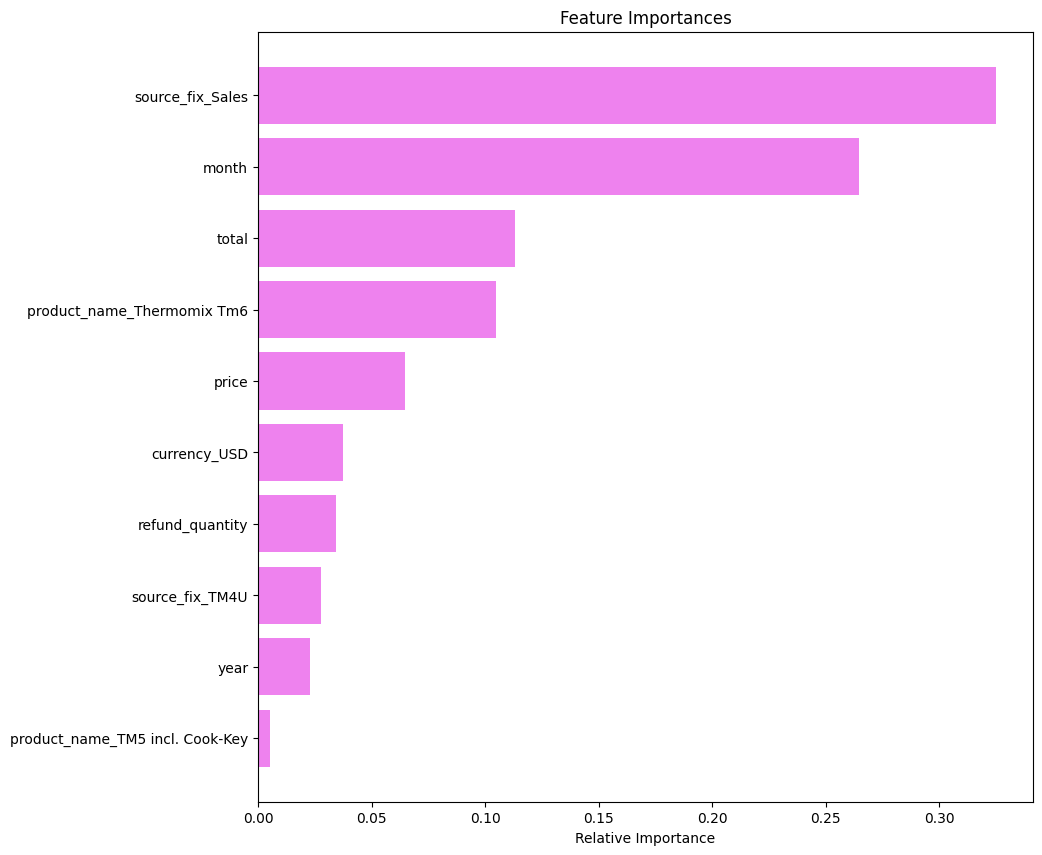

In [ ]:
# Plotting the feature importance
features = list(x.columns)

importances = rf_tuned_regressor.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()